<a id="top"></a>

<center><h1>Python <a href="http://pandas.pydata.org/pandas-docs/stable/">Pandas</a> Cheat Sheet</h1></center>

As a data analyst, these are common tasks I perform using Pandas

- [Pandas display output options](#options)
- [Quick summary statistics, # of rows, columns, etc](#quick_summary)
- [Sorting More Than One Column](#sorting)
- [Removing duplicates](#removing_duplicates)
- [Creating a column based on values from another column](#map)
- [Removing a column](#remove_column)
- [Replacing values in a series](#replacing_values)
- [Reading CSV or Excel files](http://pandas.pydata.org/pandas-docs/stable/io.html)
- [Renaming axis](#renaming_axis)
- [Renaming indexes or columns](#renaming_indexes_columns)
- [Binning data into intervals](#binning)
- [Grouping data](#group)
- [Sub-selecting or Slicing a DataFrame](#slicing)
- [Boolean indexing](#boolean)
- [Obtaining columns with partial column labels](#partial_column_labels)
- [Getting value counts](#value_counts)
- [Getting cumulative sum](#cum_sum)
- [Pivot table](#pivot_table)
- [Pivot table Percent of Rows](#perc_rows)
- [Pivot table Percent of Columns](#perc_columns)
- [Transpose a dataframe](#transpose)
- [Converting index to a column](#index2column)
- [Converting column to index](#column2index)
- [How to add or fill in missing dates](#missing_dates)
- [How to connect to an ODBC data source (Windows)](#database)
- [How to convert data in wide format to long format using melt()](#melt)
- [How to convert data in long format data to wide format using pivot()](#pivot)
- [Using category data type to control sort order](#category)
- [Merging 2 dataframes using merge()](#merge)
- [Finding rows containing data with missing values](#missing)
- [Converting a data type of a column in a dataframe](#convert_type)
- [Plotting data frames using MATPLOTLIB ver 1.5+](#matplotlib)
- [Method chaining](#chaining)
- [Sending Pandas dataframe to R using rpy2 IPython notebook extension](#rpy2)
- [BONUS: A HUGE list of python and pandas snippets by Chris Albon](http://chrisalbon.com/)

<a id='options'></a>

### Setting display output [options](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.set_option.html)

[[back to top](#top)]

In [1]:
import pandas as pd
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",20)

In [2]:
import os 
os.getcwd()

'C:\\Users\\guo\\Downloads\\数据挖掘\\02pandas数据处理'

In [3]:
import pandas as pd
data = pd.read_csv('hour.csv',index_col='instant')
# 打印前五行
data.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
# 查看数据类型
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


<a id="quick_summary">

### Quick summary statistics using df.describe() and data types using df.info()

[[back to top]](#top)

In [1]:
import pandas as pd
data = pd.DataFrame({'group': ['a', 'a', 'a', 'b','b', 'b', 'c', 'c','c'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,group,ounces
0,a,4.0
1,a,3.0
2,a,12.0
3,b,6.0
4,b,7.5
5,b,8.0
6,c,3.0
7,c,5.0
8,c,6.0


In [2]:
data.columns

Index(['group', 'ounces'], dtype='object')

In [3]:
data = data.rename(columns={'group':'label'})
data

,label,ounces
0,a,4.0
1,a,3.0
2,a,12.0
3,b,6.0
4,b,7.5
5,b,8.0
6,c,3.0
7,c,5.0
8,c,6.0


In [4]:
data = data.set_index('label')
data

,ounces
label,
a,4.0
a,3.0
a,12.0
b,6.0
b,7.5
b,8.0
c,3.0
c,5.0
c,6.0


In [10]:
d = {'one' : pd.Series([1., 2., 3.]),'two' : pd.Series([1., 2., 3., 4.])}
df = pd.DataFrame(d)
df

,one,two
0,1.0,1.0
1,2.0,2.0
2,3.0,3.0
3,NaN,4.0


# 打印列名

In [5]:
data.columns

Index(['group', 'ounces'], dtype='object')

In [9]:
datat = data.T
# datat.columns
datat[2]# 切片列

group      a
ounces    12
Name: 2, dtype: object

In [10]:
data.T.columns

RangeIndex(start=0, stop=9, step=1)

In [11]:
data.T[2]

group      a
ounces    12
Name: 2, dtype: object

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ounces,9.0,6.055556,2.855307,3.0,4.0,6.0,7.5,12.0


### df.info() shows data types, number of rows and columns, and memory usage of your dataframe

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
group     9 non-null object
ounces    9 non-null float64
dtypes: float64(1), object(1)
memory usage: 224.0+ bytes


<a id='sorting'></a>

### Sorting More Than One Column

[[back to top]](#top)

**Just pass a list of columns you want to sort and pass corresponding list of True/False to the ascending parameter**

In [6]:
data.reset_index(inplace=True)
data

,label,ounces
0,a,4.0
1,a,3.0
2,a,12.0
3,b,6.0
4,b,7.5
5,b,8.0
6,c,3.0
7,c,5.0
8,c,6.0


In [8]:
print(data.sort_values(by='label',ascending=False))


  label  ounces
6     c     3.0
7     c     5.0
8     c     6.0
3     b     6.0
4     b     7.5
5     b     8.0
0     a     4.0
1     a     3.0
2     a    12.0


In [9]:
data.sort_values(by=['label','ounces'], ascending=[False, True], inplace=True)
data

,label,ounces
6,c,3.0
7,c,5.0
8,c,6.0
3,b,6.0
4,b,7.5
5,b,8.0
1,a,3.0
0,a,4.0
2,a,12.0


In [10]:
?data.sort_values

<a id='removing_duplicates'></a>

### Removing duplicates

[[back to top](#top)]

In [11]:
import pandas as pd
data = pd.DataFrame({'k1': ['one'] * 3 + ['two'] * 4, 'k2': [3, 2, 1, 3, 3, 4, 4]})
data

,k1,k2
0,one,3
1,one,2
2,one,1
3,two,3
4,two,3
5,two,4
6,two,4


In [12]:
data.drop_duplicates(keep='last')  # by default, duplicate is defined by all columns

,k1,k2
0,one,3
1,one,2
2,one,1
4,two,3
6,two,4


# 帮助

In [13]:
?data.drop_duplicates

### Define duplicates by column name(s):

In [14]:
print(data)
data.drop_duplicates(subset='k1')  # duplicate in column k1 only

    k1  k2
0  one   3
1  one   2
2  one   1
3  two   3
4  two   3
5  two   4
6  two   4


,k1,k2
0,one,3
3,two,3


In [16]:
data['k1'] = data['k1'].drop_duplicates()  # duplicate in column k1 only
data

,k1,k2
0,one,3
1,NaN,2
2,NaN,1
3,two,3
4,NaN,3
5,NaN,4
6,NaN,4


<a id="map"></a>

### Creating a new column based on values from another column

[[back to top](#top)]

In [17]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami','corned beef', 'Bacon', 'pastrami', 'honey ham','nova lox'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


### Suppose you wanted to add a column indicating the type of animal that each food came from. Let’s write down a mapping of each distinct meat type to the kind of animal using a dictionary and a function:

In [18]:
meat_to_animal = {
'bacon': 'pig',
'pulled pork': 'pig',
'pastrami': 'cow',
'corned beef': 'cow',
'honey ham': 'pig',
'nova lox': 'salmon'
}

In [19]:
data['animal'] = data['food'].map(str.lower).map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [12]:
def meat2animal(series):
    if series["food"]=='bacon':
        return 'pig'
    elif series["food"]=='Bacon':
        return 'pig'
    elif series["food"]=='pulled pork':
        return 'pig'
    elif series["food"]=='pastrami':
        return 'cow'
    elif series["food"]=='corned beef':
        return 'cow'
    elif series["food"]=='honey ham':
        return 'pig'
    else:
        return 'salmon'

#### Or we could use apply() and apply the meat2animal() function to the new column:

In [13]:
# axis=1 means to apply the function for each row, but I prefer to use axis='columns' instead
data['animal2'] = data.apply(meat2animal,axis='columns')
data

,food,ounces,animal,animal2
0,bacon,4.0,pig,pig
1,pulled pork,3.0,pig,pig
2,bacon,12.0,pig,pig
3,Pastrami,6.0,cow,salmon
4,corned beef,7.5,cow,cow
5,Bacon,8.0,pig,pig
6,pastrami,3.0,cow,cow
7,honey ham,5.0,pig,pig
8,nova lox,6.0,salmon,salmon


### We can also use [dataframe.assign()](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro-chained-assignment) function which was added in pandas version 0.16

In [20]:
import numpy as np
df = pd.DataFrame({'data1' : np.random.randn(5),    # 标准正态分布     均值为0 标准差为1 
                   'data2' : np.random.randn(5)})

# df.assign(ratio = df['data1'] / df['data2'])
df['ratio'] = df['data1'] / df['data2']

,data1,data2,ratio
0,1.010496,-1.137350,-0.888466
1,-1.346539,0.314786,-4.277637
2,-0.261916,-0.112308,2.332126
3,1.175010,1.888676,0.622134
4,1.278870,-0.603740,-2.118246


In [5]:
import numpy as np
?np.random.randn()

[[back to top](#top)]

<a id='remove_column'></a>

### Removing or dropping a column

[[back top top](#top)]

In [21]:
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [11]:
data.drop(7,axis=0,inplace=True)
data.drop('group',axis=1,inplace=True)

del data['ounces']

col = ['a','b','c']
data.drop(col,axis=1,inplace=True)

,ounces
0,4.0
1,3.0
2,12.0
3,6.0
4,7.5
6,3.0
8,6.0


In [14]:
#print data
data.drop('animal2', axis=1, inplace=True)  # dropping/removing a column
print(data)

          food  ounces  animal
0        bacon     4.0     pig
1  pulled pork     3.0     pig
2        bacon    12.0     pig
3     Pastrami     6.0     cow
4  corned beef     7.5     cow
5        Bacon     8.0     pig
6     pastrami     3.0     cow
7    honey ham     5.0     pig
8     nova lox     6.0  salmon


<a id="replacing_values"></a>

### Replacing Values in a Series

[[back to top](#top)]

In [22]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

#### If you want to replace -999 with NaN:

In [23]:
data.replace(-999, np.nan, inplace=True)
data

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

#### If you want to replace multiple values at once, you instead pass a list then the substitute value:

In [24]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [25]:
import numpy as np
data.replace([-999, -1000], np.nan, inplace=True)
data

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

<a name="renaming_axis"></a>
<br>
<br>

### Renaming Axis Indexes

[[back to top](#top)]

In [26]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),index=['Ohio', 'Colorado', 'New York'],columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [27]:
# data.index
data.columns  = data.columns.map(str.title)
data

,One,Two,Three,Four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [22]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [28]:
data.index = data.index.map(str.upper)
data

,One,Two,Three,Four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


#### If you want to create a transformed version of a data set without modifying the original, a useful method is rename:

In [29]:
data.rename(index=str.title, columns=str.upper, inplace=True)  # str.title means to make the 1st letter capitalized only
data

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


<a id="renaming_indexes_columns"></a>

### Renaming Indexes or Columns

[[back to top](#top)]

#### <i>rename()</i> can be used in conjunction with a dict-like object providing new values for a subset of the axis labels:

In [30]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),index=['Ohio', 'Colorado', 'New York'],columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [31]:
data.rename(index={'Ohio': 'INDIANA'},columns={'three': 'peekaboo'},inplace=True)
data

,one,two,peekaboo,four
INDIANA,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


You can also apply str functions to modify the index or column labels

In [27]:
data.rename(index=str.title, columns=str.upper, inplace=True)  # str.title means to make the 1st letter capitalized only
data

,ONE,TWO,PEEKABOO,FOUR
Indiana,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


<a id="binning"></a>

### Binning Data Into Intervals

[[back to top](#top)]

In [32]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

#### Let’s divide these into bins of 18 to 25, 26 to 35, 35 to 60, and finally 60 and older. To do so, you have to use <i>cut()</i> function:

In [33]:
bins = [18, 25, 35, 60, 100]

In [23]:
cats = pd.cut(ages, bins)    # 数值离散化 -----分箱操作
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [24]:
cats.labels

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'labels' is deprecated. Use 'codes' instead
  """Entry point for launching an IPython kernel.


array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [25]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

#### If you want the right value to be exclusive in the intervals:

In [39]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

#### You can also pass your own bin names by passing a list or array to the labels option:

In [40]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)
pd.value_counts(pd.cut(ages, bins, labels=group_names))

Youth         5
MiddleAged    3
YoungAdult    3
Senior        1
dtype: int64

[[back to top](#top)]

<a id="group"></a>

## Grouping Data ( see also [value_count()](#value_counts) and [pivot_table()](#pivot_table) )

[[back to top](#top)]

In [34]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-0.059725,0.175606
1,a,two,-0.546191,-0.248155
2,b,one,2.009305,-0.071773
3,b,two,1.995286,-0.137098
4,a,one,0.656330,0.412145


In [36]:
df['key1'].value_counts()

a    3
b    2
Name: key1, dtype: int64

In [38]:
grouped = df['data1'].groupby(df['key1'])
list(grouped)
grouped.max()

key1
a    0.656330
b    2.009305
Name: data1, dtype: float64

<a id='slicing'></a>

## Sub-selecting or Slicing a DataFrame

[[back to top](#top)]

Filtering by label name: [[loc](#loc)]<br>
Filtering by index row and/or column: [[iloc](#iloc)]

<a id='df'></a>

In [39]:
import numpy as np
import pandas as pd

dates = pd.date_range('20130101',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.806267,-0.637439,-0.273875,0.678684
2013-01-02,1.388575,-1.360396,-0.412307,0.292096
2013-01-03,0.535935,0.298362,-0.705676,-1.237383
2013-01-04,-0.684736,-1.662544,-0.567658,-1.299684
2013-01-05,0.173643,-2.655548,2.604346,-0.161758
2013-01-06,-1.757442,2.045483,0.186594,-0.554004


In [41]:
df.ix[:,'D']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


2013-01-01    0.678684
2013-01-02    0.292096
2013-01-03   -1.237383
2013-01-04   -1.299684
2013-01-05   -0.161758
2013-01-06   -0.554004
Freq: D, Name: D, dtype: float64

In [29]:
df.loc[:,['A','D']]

,A,D
2013-01-01,-0.661799,-0.167351
2013-01-02,-1.992852,0.457024
2013-01-03,0.287349,-0.554314
2013-01-04,1.269465,1.145767
2013-01-05,0.425360,1.517509
2013-01-06,-1.060786,-0.506312


### Getting first n rows of dataframe using index slicing syntax

In [21]:
df[0:3]  # get first 3 rows of the dataframe 
df.iloc[0:3,:]
df['A']
df[['A','B']]
df.iloc[1,0:3]

,A,B,C,D
2013-01-01,0.611375,-1.099788,-0.501385,0.241843
2013-01-02,0.110344,1.289243,-0.304434,0.036104
2013-01-03,0.400963,1.455863,1.544212,-0.554954


### Slicing based on dataframe's index range

In [22]:
df['20130102':'20130104'] # get rows by index range

,A,B,C,D
2013-01-02,0.110344,1.289243,-0.304434,0.036104
2013-01-03,0.400963,1.455863,1.544212,-0.554954
2013-01-04,1.071701,0.645987,0.789083,-0.326753


<a id='loc'></a>

### Slicing based on column labels/names using loc

[[view df](#slicing)]

In [48]:
df.loc[:,['A','B']]  # syntax is: df.loc[rows_index, cols_index]

,A,B
2013-01-01,0.066974,1.916258
2013-01-02,-0.313442,1.053745
2013-01-03,-0.843638,0.030844
2013-01-04,2.742310,0.908416
2013-01-05,1.631723,-0.532335
2013-01-06,1.696361,0.801829


### Slicing based on row index label and column label combined using loc

In [42]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,1.388575,-1.360396
2013-01-03,0.535935,0.298362
2013-01-04,-0.684736,-1.662544


<a id='iloc'></a>

### Slicing based on index position of the row or column using iloc

[[view df](#slicing)]

In [43]:
df.iloc[3]  # returns 4th row (index=3) of the dataframe    1.269465	0.961895	-0.421359	1.145767

A   -0.684736
B   -1.662544
C   -0.567658
D   -1.299684
Name: 2013-01-04 00:00:00, dtype: float64

In [51]:
df.iloc[3:5,0:2]  # returns specific range of rows and columns of the dataframe

,A,B
2013-01-04,2.742310,0.908416
2013-01-05,1.631723,-0.532335


In [52]:
df.iloc[[1,5],[0,2]] # returns specific rows and columns using lists containing columns or row indexes

,A,C
2013-01-02,-0.313442,-0.254413
2013-01-06,1.696361,-0.322756


In [53]:
df.iloc[1:3,:]  # returning specific rows and returning all columns

,A,B,C,D
2013-01-02,-0.313442,1.053745,-0.254413,0.748612
2013-01-03,-0.843638,0.030844,1.204650,0.428921


In [54]:
df.iloc[:,1:3]  # returning all rows and specific columns

,B,C
2013-01-01,1.916258,0.080180
2013-01-02,1.053745,-0.254413
2013-01-03,0.030844,1.204650
2013-01-04,0.908416,-0.067456
2013-01-05,-0.532335,-0.847099
2013-01-06,0.801829,-0.322756


In [55]:
df.iloc[1,1]  # getting secific scalar/single value

1.0537454541723381

<a id='boolean'></a>

## [Boolean Indexing](http://pandas.pydata.org/pandas-docs/stable/indexing.html#boolean-indexing)

[[view df](#df)]

The boolean operators are: **|** for or, <strong>&</strong> for and, and **~** for not. These **must** be grouped by using parentheses.

In [36]:
print(df) 
df[df.A > 0]  # or df[df["A"] > -0.5], this syntax works when there is a space in the column name

                   A         B         C         D
2013-01-01 -0.661799 -1.127869 -0.926087 -0.167351
2013-01-02 -1.992852  0.608250  0.037019  0.457024
2013-01-03  0.287349  0.536012 -0.312023 -0.554314
2013-01-04  1.269465  0.961895 -0.421359  1.145767
2013-01-05  0.425360  0.207193 -0.371409  1.517509
2013-01-06 -1.060786  0.224652  2.183464 -0.506312


,A,B,C,D
2013-01-03,0.287349,0.536012,-0.312023,-0.554314
2013-01-04,1.269465,0.961895,-0.421359,1.145767
2013-01-05,0.425360,0.207193,-0.371409,1.517509


or I've seen some people do boolean filtering by passing "criteria" variable to the dataframe like so:

In [57]:
criteria = df.A >0
df[criteria]

,A,B,C,D
2013-01-01,0.066974,1.916258,0.080180,0.199495
2013-01-04,2.742310,0.908416,-0.067456,-0.722209
2013-01-05,1.631723,-0.532335,-0.847099,-0.268815
2013-01-06,1.696361,0.801829,-0.322756,-0.102820


In [44]:
df2 = df.copy()
df2['E']=['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,-0.806267,-0.637439,-0.273875,0.678684,one
2013-01-02,1.388575,-1.360396,-0.412307,0.292096,one
2013-01-03,0.535935,0.298362,-0.705676,-1.237383,two
2013-01-04,-0.684736,-1.662544,-0.567658,-1.299684,three
2013-01-05,0.173643,-2.655548,2.604346,-0.161758,four
2013-01-06,-1.757442,2.045483,0.186594,-0.554004,three


In [59]:
df2[df2['E'].isin(['two','four'])]  # read as "return rows where column E contains two or four"

,A,B,C,D,E
2013-01-03,-0.843638,0.030844,1.204650,0.428921,two
2013-01-05,1.631723,-0.532335,-0.847099,-0.268815,four


#### We can also do partial string matching.  So let's say you don't know the exact spelling a word is you want to match, you can do this:

In [44]:
df2[df2.E.str.contains("tw|ou")]

,A,B,C,D,E
2013-01-03,-0.807639,1.04682,-0.391362,-1.759465,two
2013-01-05,0.668371,-0.24168,-0.574112,-0.949463,four


#### Using ~ to do a "NOT"

In [47]:
df2[~df2['E'].isin(['two','four'])]  # column E containing values not in two or four

,A,B,C,D,E
2013-01-01,0.761812,-0.272661,-1.978075,-0.438507,one
2013-01-02,-1.695557,0.827736,-0.964117,1.263270,one
2013-01-04,-0.186398,-0.563583,1.362846,0.742287,three
2013-01-06,-0.973880,-0.988273,-1.065027,0.957048,three


#### Filtering using query() method

In [46]:
import numpy as np
import pandas as pd

dates = pd.date_range('20130101',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,1.860265,-1.208493,-0.746229,1.308568
2013-01-02,1.902098,-0.142773,-1.276433,-0.203333
2013-01-03,-0.073507,1.077914,-0.134747,-0.635555
2013-01-04,-2.350699,-0.781128,0.334857,2.224046
2013-01-05,0.012006,1.113106,0.362299,-0.868066
2013-01-06,0.020592,0.871467,0.324831,1.228213


In [48]:
# df.query('A > C')
df[df['A'] > df['C']]

,A,B,C,D
2013-01-01,1.860265,-1.208493,-0.746229,1.308568
2013-01-02,1.902098,-0.142773,-1.276433,-0.203333
2013-01-03,-0.073507,1.077914,-0.134747,-0.635555


In [50]:
df.query('A > 0')

,A,B,C,D
2013-01-02,0.951390,-2.267417,0.170922,0.523848
2013-01-03,0.364236,-0.147012,0.534480,-0.292837
2013-01-05,2.086283,0.445289,0.026680,0.929063


In [40]:
df.query('A > 0 & A < 1')
df[df['A']>0][df['A']<1]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,A,B,C,D
2013-01-06,0.270732,0.149674,-0.736579,0.014627


In [52]:
df.query('A > B | A > C')  # where A is greater than B or A is greater than C
df[df['A']>0 or df['A']<1]

,A,B,C,D
2013-01-02,0.951390,-2.267417,0.170922,0.523848
2013-01-03,0.364236,-0.147012,0.534480,-0.292837
2013-01-05,2.086283,0.445289,0.026680,0.929063
2013-01-06,-0.337497,-0.216180,-0.620531,1.484270


<a id='partial_column_labels'></a>

## Obtaining columns with partial column labels

[[back to top](#top)]

In [49]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,0.654259,-0.645981
1,a,two,-1.078399,-1.106716
2,b,one,-0.691287,-1.060212
3,b,two,0.505615,-0.968822
4,a,one,-0.207732,0.967589


In [3]:
?df.filter()

In [50]:
df.filter(like='data')

,data1,data2
0,0.654259,-0.645981
1,-1.078399,-1.106716
2,-0.691287,-1.060212
3,0.505615,-0.968822
4,-0.207732,0.967589


<a id='value_counts'></a>

## Getting Value Counts

It is so tempting to use the groupby() function or pivot_table, but most of the time, value_counts() function is all we need.

[[back to top](#top)]

In [55]:
import pandas as pd
data = pd.DataFrame({'group': ['a', 'a', 'a', 'b','b', 'b', 'c', 'c','c'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,group,ounces
0,a,4.0
1,a,3.0
2,a,12.0
3,b,6.0
4,b,7.5
5,b,8.0
6,c,3.0
7,c,5.0
8,c,6.0


In [56]:
data.group.value_counts()

b    3
a    3
c    3
Name: group, dtype: int64

<a id='cum_sum'></a>

## Getting Cumulative Sum

[[back to top](#top)]

In [57]:
data.group.value_counts().cumsum()

b    3
a    6
c    9
Name: group, dtype: int64

<a id='pivot_table'></a>

## Pivot table example - see also this excellent [article](http://pbpython.com/pandas-pivot-table-explained.html) on pivot tables

[[back to top](#top)]

In [43]:
import pandas as pd
data = pd.DataFrame({'group': ['a', 'a', 'a', 'b','b', 'b', 'c', 'c','c'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,group,ounces
0,a,4.0
1,a,3.0
2,a,12.0
3,b,6.0
4,b,7.5
5,b,8.0
6,c,3.0
7,c,5.0
8,c,6.0


#### Calculating the means of each group

In [44]:
data.pivot_table(values='ounces',index='group',aggfunc=np.mean)

,ounces
group,
a,6.333333
b,7.166667
c,4.666667


#### Getting counts by group

In [60]:
data.pivot_table(values='ounces',index='group',aggfunc='count')

,ounces
group,
a,3
b,3
c,3


#### Getting cumulative sum or running total of the group counts

In [61]:
data.pivot_table(values='ounces',index='group',aggfunc='count').cumsum()

,ounces
group,
a,3
b,6
c,9


In [62]:
import pandas as pd

# sample data can be dowloaded here: http://pbpython.com/extras/sales-funnel.xlsx
#df = pd.read_csv('/home/pybokeh/Downloads/sales-funnel.csv')

In [13]:
df.head()

,data1,data2,key1,key2
0,-0.753180,-1.596746,a,one
1,-0.654603,-0.870286,a,two
2,1.350369,1.253327,b,one
3,0.982751,-1.116576,b,two
4,0.480645,-0.356635,a,one


In [15]:
by_rep = pd.pivot_table(data=df, index='key1', columns='key2', values='data1', aggfunc='count', fill_value=0)
by_rep

key2,one,two
key1,,
a,2,1
b,1,1


<a id='perc_rows'></a>

#### Percent of rows

[[back to top](#top)]

In [16]:
perc_of_rows = by_rep.apply(lambda x : x / x.sum() * 100, axis='columns') # or axis=1
perc_of_rows

key2,one,two
key1,,
a,66.666667,33.333333
b,50.000000,50.000000


<a id='perc_columns'></a>

#### Percent of columns

[[back to top](#top)]

In [17]:
perc_of_columns = by_rep.apply(lambda x : x / x.sum() * 100, axis='index') # or axis=0
perc_of_columns

key2,one,two
key1,,
a,66.666667,50.0
b,33.333333,50.0


<a id='transpose'></a>

## Transpose a dataframe

[[back to top](#top)]

Let's say you have a dataframe with several columns and having a hard time scrolling to see what the data looks like.  Transpose it!

In [51]:
import pandas as pd

df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-2.369164,0.486351
1,a,two,0.910438,-0.720688
2,b,one,-0.268803,0.287483
3,b,two,-0.507749,-0.428179
4,a,one,0.448320,-2.033947


In [53]:
# df.head().transpose()
df.T

,0,1,2,3,4
key1,a,a,b,b,a
key2,one,two,one,two,one
data1,-2.36916,0.910438,-0.268803,-0.507749,0.44832
data2,0.486351,-0.720688,0.287483,-0.428179,-2.03395


You can also do df.dtypes to accomplish similar output, but it's nice to see actual data along with the columns.

In [20]:
df.dtypes

data1    float64
data2    float64
key1      object
key2      object
dtype: object

<a id="index2column"></a>

## Converting a dataframe index to a column

[[back to top](#top)]

In [54]:
import pandas as pd
data = pd.DataFrame({'group': ['a', 'a', 'a', 'b','b', 'b', 'c', 'c','c'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,group,ounces
0,a,4.0
1,a,3.0
2,a,12.0
3,b,6.0
4,b,7.5
5,b,8.0
6,c,3.0
7,c,5.0
8,c,6.0


In [81]:
data.reset_index(level=0, inplace=True)
data

,index,group,ounces
0,0,a,4.0
1,1,a,3.0
2,2,a,12.0
3,3,b,6.0
4,4,b,7.5
5,5,b,8.0
6,6,c,3.0
7,7,c,5.0
8,8,c,6.0


<a id="column2index">

## How to set the data frame's index to be one of the columns

[[back to top]](#top)

In [33]:
import pandas as pd
col = ['a','b','c']
data = pd.DataFrame([[1,2,3],[10,11,12],[20,21,22]],columns=col)
data

,a,b,c
0,1,2,3
1,10,11,12
2,20,21,22


In [34]:
data = data.set_index('a')
data

,b,c
a,,
1,2,3
10,11,12
20,21,22


To remove the index name ("a"), do:

In [35]:
data.index.name = None
data

,b,c
1,2,3
10,11,12
20,21,22


<a id='missing_dates'></a>

## How to add or fill in missing dates

[[back to top]](#top)

In [36]:
import pandas as pd

idx = pd.date_range('09-01-2013', '09-30-2013')

print(idx)
s = pd.Series({'09-02-2013': 2,
               '09-03-2013': 10,
               '09-06-2013': 5,
               '09-07-2013': 1})
s

DatetimeIndex(['2013-09-01', '2013-09-02', '2013-09-03', '2013-09-04',
               '2013-09-05', '2013-09-06', '2013-09-07', '2013-09-08',
               '2013-09-09', '2013-09-10', '2013-09-11', '2013-09-12',
               '2013-09-13', '2013-09-14', '2013-09-15', '2013-09-16',
               '2013-09-17', '2013-09-18', '2013-09-19', '2013-09-20',
               '2013-09-21', '2013-09-22', '2013-09-23', '2013-09-24',
               '2013-09-25', '2013-09-26', '2013-09-27', '2013-09-28',
               '2013-09-29', '2013-09-30'],
              dtype='datetime64[ns]', freq='D')


09-02-2013     2
09-03-2013    10
09-06-2013     5
09-07-2013     1
dtype: int64

#### From above, we have holes in our data.  Let's fill in those missing holes using the idx date_range we specified above.

In [72]:
s.index = pd.DatetimeIndex(s.index)

s = s.reindex(idx, fill_value=0)
s

#s = s.reindex(idx, fill='bfill')#
#s  #

2013-09-01     0
2013-09-02     2
2013-09-03    10
2013-09-04     0
2013-09-05     0
2013-09-06     5
2013-09-07     1
2013-09-08     0
2013-09-09     0
2013-09-10     0
2013-09-11     0
2013-09-12     0
2013-09-13     0
2013-09-14     0
2013-09-15     0
2013-09-16     0
2013-09-17     0
2013-09-18     0
2013-09-19     0
2013-09-20     0
2013-09-21     0
2013-09-22     0
2013-09-23     0
2013-09-24     0
2013-09-25     0
2013-09-26     0
2013-09-27     0
2013-09-28     0
2013-09-29     0
2013-09-30     0
Freq: D, dtype: int64

<a id='database'></a>

## How to connect and query against a database registered as an ODBC data source (Windows)

[[back to top]](#top)

In [ ]:
import pymysql           # If using PostgreSQL, MySQL, SQLite, Redshift, MS SQL Server, or Oracle, use db.py instead
import pandas as pd
from getpass import getpass    # Module that will create a text input widget AND mask your password

userid = 'root'
pw = getpass(prompt='Enter your password: ')

cnxn_string = 'DSN=your_dsn;UID=' + userid + ';PWD=' + pw

cnxn = pyodbc.connect(cnxn_string)
cursor = cnxn.cursor()

sql = """
SELECT * from your_table...
"""

df = pd.read_sql(sql, cnxn, index_col=None, parse_dates={'some_column':"%Y-%m-%d"})

# Close connections
cursor.close()
cnxn.close()

### Also check out Yhat's [db.py](https://github.com/yhat/db.py).  Currently, doesn't support IBM DB2.  So I'm stuck with pyodbc at work for now.

<a id='melt'></a>

## How to convert data in wide format to long format using pd.melt()

[[back to top](#top)]

When using [ggplot](https://github.com/yhat/ggplot) to plot data where you have multiple data series you want to plot, you need to convert data in wide format to long format.

In [ ]:
from pandas_datareader import data as web
from datetime import datetime
import pandas as pd

stocks = {'tech':['GOOGL', 'MSFT', 'LNKD', 'YHOO', 'FB','HPQ','AMZN'],
          'auto':['TM','F','GM','HMC','NSANY','HYMTF'],
          'housing':['HD','WMT','LOW']
          }

start_date = datetime(2014,1,1)
end_date = datetime(2014, 11, 30)

def get_px(stock, start, end):
    return web.get_data_yahoo(stock, start, end)['Adj Close']

df = pd.DataFrame({n: get_px(n, start_date, end_date) for n in stocks['tech']})

### Below is what data looks like in 'wide' format:

In [ ]:
df.head(10)

In [9]:
# Create a column from the index values
df.reset_index(level=0, inplace=True)
df.head(10)

,Date,AMZN,FB,GOOGL,HPQ,LNKD,MSFT,YHOO
0,2014-01-02,397.970001,54.709999,557.117134,26.726783,207.639999,35.448341,39.590000
1,2014-01-03,396.440002,54.560001,553.053047,27.383841,207.419998,35.209856,40.119999
2,2014-01-06,393.630005,57.200001,559.219245,27.335529,203.919998,34.465786,39.930000
3,2014-01-07,398.029999,57.919998,570.000007,27.229239,209.639999,34.732887,40.919998
4,2014-01-08,401.920013,58.230000,571.186226,26.523869,209.059998,34.112826,41.020000
5,2014-01-09,401.010010,57.220001,565.685676,26.678471,215.250000,33.893420,40.919998
6,2014-01-10,397.660004,57.939999,565.655647,26.765435,218.750000,34.379931,41.230000
7,2014-01-13,390.980011,55.910000,562.052070,27.171264,213.539993,33.368755,39.990002
8,2014-01-14,397.540009,57.740002,575.275276,27.876635,216.220001,34.131905,41.139999
9,2014-01-15,395.869995,57.599998,574.884895,27.866972,216.000000,35.066764,41.070000


### This is what data looks like in 'long' format:

In [ ]:
df_long = pd.melt(df, id_vars=['Date']).dropna()
df_long.head()

In [ ]:
df_long.tail()

In [12]:
df_long.rename(columns={'variable': 'Stock', 'value':'Price'},inplace=True)
df_long.head(10)

,Date,Stock,Price
0,2014-01-02,AMZN,397.970001
1,2014-01-03,AMZN,396.440002
2,2014-01-06,AMZN,393.630005
3,2014-01-07,AMZN,398.029999
4,2014-01-08,AMZN,401.920013
5,2014-01-09,AMZN,401.010010
6,2014-01-10,AMZN,397.660004
7,2014-01-13,AMZN,390.980011
8,2014-01-14,AMZN,397.540009
9,2014-01-15,AMZN,395.869995


#### Now we can plot the stock prices.  Since the data is in long format, we can take advantage of ggplot's color= parameter, which will magically make line charts with different colors for each stock.  If the data was in wide format, you would have had to manually specify all the different stocks to plot or use a loop construct.

[[back to top](#top)] [[back to section](#melt)]

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from ggplot import *

stock_plot = ggplot(df_long, aes(x='Date', y='Price', color='Stock')) + \
        geom_line() + \
        ylab('Price (US$)') + \
        ggtitle('Auto Stocks: Adj Close') + \
        scale_x_date(labels='%b %d %y',breaks=date_breaks('3 months') )
    
# Have to use MATPLOTLIB api to rotate x tick labels.  Hopefully some day, ggplot will implement a rotation option.
fig = stock_plot.draw()
ax = fig.gca()
labels = ax.get_xticklabels() 
for label in labels: 
    label.set_rotation(270)
plt.show()

#### [ggplot](http://blog.yhathq.com/posts/ggplot-for-python.html) is AWESOME!

<a id='pivot'></a>

## How to convert data in long format to wide format using pd.pivot()

[[back to top](#top)]

In [ ]:
pivoted = df_long.pivot(index='Date', columns='Stock', values='Price')
pivoted.head()

<a id='category'></a>

## Using category data type to control sort order

[[back to top](#top)]

In [98]:
import pandas as pd
data = pd.DataFrame({'medal': ['bronze', 'silver', 'silver', 'gold','bronze', 'bronze', 'gold', 'gold','gold'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,medal,ounces
0,bronze,4.0
1,silver,3.0
2,silver,12.0
3,gold,6.0
4,bronze,7.5
5,bronze,8.0
6,gold,3.0
7,gold,5.0
8,gold,6.0


In [ ]:
data.dtypes
data["medal"] = data["medal"].astype("category")
data.dtypes

In [101]:
data.sort_values(by=["medal"])

,medal,ounces
0,bronze,4.0
4,bronze,7.5
5,bronze,8.0
3,gold,6.0
6,gold,3.0
7,gold,5.0
8,gold,6.0
1,silver,3.0
2,silver,12.0


### Now define the order of the cetgorical data using set_categories()

[[back to top](#top)] [[back to section](#category)]

In [ ]:
data["medal"].cat.set_categories([ "gold","silver","bronze"],inplace=True)

In [ ]:
data.sort_values(by=["medal"])

<a id='merge'></a>

### Merging 2 dataframes using merge()

[[back to top](#top)]

In [ ]:
import pandas as pd
left = pd.DataFrame({'group': ['a', 'a', 'a', 'b','b', 'b', 'c', 'c','c'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
left

In [ ]:
right = pd.DataFrame({'label': ['a','b','c'],
                     'value': ['alpha','beta','charlie']})
right

#### By default, merge() does an inner join, but you can specify 'left', 'right', or 'outer' joins

In [104]:
inner_joined = pd.merge(left, right, how='inner', left_on='group', right_on='label')
inner_joined

,group,ounces,label,value
0,a,4.0,a,alpha
1,a,3.0,a,alpha
2,a,12.0,a,alpha
3,b,6.0,b,beta
4,b,7.5,b,beta
5,b,8.0,b,beta
6,c,3.0,c,charlie
7,c,5.0,c,charlie
8,c,6.0,c,charlie


#### For more on merge, join, and concatenate, see the official [docs](http://pandas.pydata.org/pandas-docs/stable/merging.html)

<a id="missing"></a>

### Finding rows of a dataframe containing missing data

[[back to top](#top)]

In [106]:
import numpy as np
import pandas as pd
df = pd.DataFrame([range(3), [0, np.NaN, 0], [0, 0, np.NaN], range(3), range(3)])
df

,0,1,2
0,0,1,2
1,0,NaN,0
2,0,0,NaN
3,0,1,2
4,0,1,2


In [111]:
df.isnull()

,0,1,2
0,False,False,False
1,False,True,False
2,False,False,True
3,False,False,False
4,False,False,False


In [113]:
df.isnull().any(axis=1)

0    False
1     True
2     True
3    False
4    False
dtype: bool

In [114]:
df[df.isnull().any(axis=1)]

,0,1,2
1,0,NaN,0
2,0,0,NaN


<a id='convert_type'></a>

### Converting a data type of a column in a dataframe

[[back to top](#top)]

In [115]:
import pandas as pd

a = [['a', '1.2', '4.2'], ['b', '70', '0.03'], ['x', '5', '0']]
df = pd.DataFrame(a, columns=['one', 'two', 'three'])
df

,one,two,three
0,a,1.2,4.2
1,b,70,0.03
2,x,5,0


In [116]:
df.dtypes

one      object
two      object
three    object
dtype: object

In [117]:
df[['two', 'three']] = df[['two', 'three']].astype(float)

In [15]:
df.dtypes

one       object
two      float64
three    float64
dtype: object

<a id="matplotlib">

### Plotting dataframes using MATPLOTLIB version 1.5 and up

[[back to top](#top)]

Starting with version 1.5, you can now pass a "data" parameter inside MATPLOTLIB's plot() function

Prior to version 1.5:

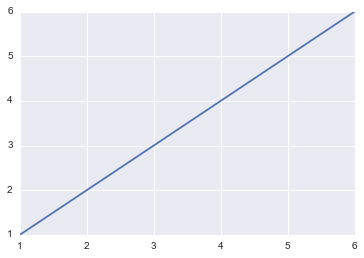

In [122]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({"var1":[1,2,3,4,5,6], "var2":[1,2,3,4,5,6]})
plt.plot(df["var1"], df["var2"])
plt.show()

With version 1.5+

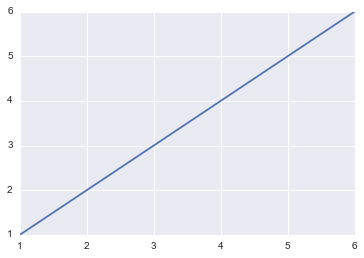

In [123]:
plt.plot("var1", "var2", data=df)
plt.show()

<a id="chaining"></a>

### Method Chaining

[[back to top](#top)]

With method chaining, it eliminates the need for making intermediary variables.  You can process your data frame in a series of method calls when you enclose your data frame with parenthesis. Here's a contrived example:

In [120]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = (pd.read_csv('/home/pybokeh/temp/vehicles.csv',
                 usecols=['year', 'make', 'model', 'comb08', 'fuelType', 'fuelType1', 
                          'fuelType2', 'atvType', 'cylinders', 'VClass'])
      .rename(columns={'comb08':'combmpg'})
      .query("make in('Honda','Acura','Toyota','Lexus') \
              & fuelType1 in('Regular Gasoline','Premium Gasoline','Midgrade Gasoline') \
              & cylinders in(4, 6) \
              & VClass in('Compact Cars','Subcompact Cars','Midsize Cars') \
              & ~(fuelType2 in('E85','Electricity','Natural Gas','Propane'))")
      ['combmpg'].plot.hist(alpha=0.5, label='Honda Motor Co')
     )
plt.title("Histogram of Combined Hwy+City MPG", weight="bold")
plt.show()

IOError: File /home/pybokeh/temp/vehicles.csv does not exist

**Also check out [pipe() method](http://pandas.pydata.org/pandas-docs/stable/basics.html#tablewise-function-application).**

<a id="rpy2">

### Sending Pandas dataframe to R using rpy2 IPython notebook extension

[[back to top](#top)]

Assuming you have [R](http://www.r-project.org/) and [rpy2](http://rpy.sourceforge.net/rpy2/doc-2.4/html/interactive.html#module-rpy2.ipython.rmagic) installed, we can send a Pandas dataframe to R using the rpy2 IPython notebook extension to take advantage of R's various statistical and graphing packages.

#### Simple example where I will pull Yen currency exchange rate data from the web and graph it using R's ggplot2 library:

In [1]:
# load the rpy2 extension
%load_ext rpy2.ipython

#### Let's fetch the exchange rate data:

In [2]:
import pandas as pd

pandas_df = pd.read_csv('http://research.stlouisfed.org/fred2/data/EXJPUS.txt', sep='  ', skiprows=28, engine='python',
                 parse_dates=[0], header=None, names=['Month','Value'])

#### Sanity check on the data:

In [3]:
pandas_df.dtypes

Month    datetime64[ns]
Value           float64
dtype: object

In [4]:
pandas_df.tail()

,Month,Value
528,2015-01-01,118.2500
529,2015-02-01,118.7600
530,2015-03-01,120.3945
531,2015-04-01,119.5095
532,2015-05-01,119.7064


#### We'll use this one-liner %R magic command to send the Pandas dataframe to R as input using the "-i" flag.  See [here](http://rpy.sourceforge.net/rpy2/doc-2.4/html/interactive.html#module-rpy2.ipython.rmagic) for other flags.

In [7]:
%R -i pandas_df

#### Alternatively, you can use pandas built-in [facility](http://pandas.pydata.org/pandas-docs/stable/r_interface.html) to do this:

In [5]:
from rpy2.robjects import pandas2ri
pandas2ri.activate()

#### Next, we'll use %%R magic command which will make the entire code cell R executable:

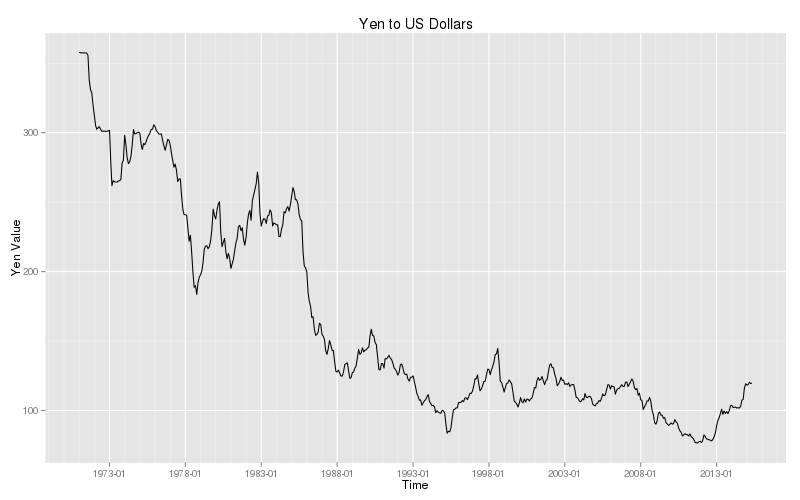

In [8]:
%%R -w 800 -h 500 -u px # instead of px, you can also choose 'in', 'cm', or 'mm'
df = as.data.frame(pandas_df)  # ensure dataframe that was passed in from Python will be R's dataframe type
library(ggplot2)        # plotting library
library(scales)         # enables us to change the x label time scale

p = ggplot(pandas_df, aes(pandas_df$Month, pandas_df$Value))
p = p + 
    geom_line() +
    scale_x_datetime(labels=date_format("%Y-%m"), breaks="5 years", minor_breaks="1 year") +
    ggtitle("Yen to US Dollars") +
    xlab("Time") +
    ylab("Yen Value")
print(p)

[[back to top](#top)]